# Day 11

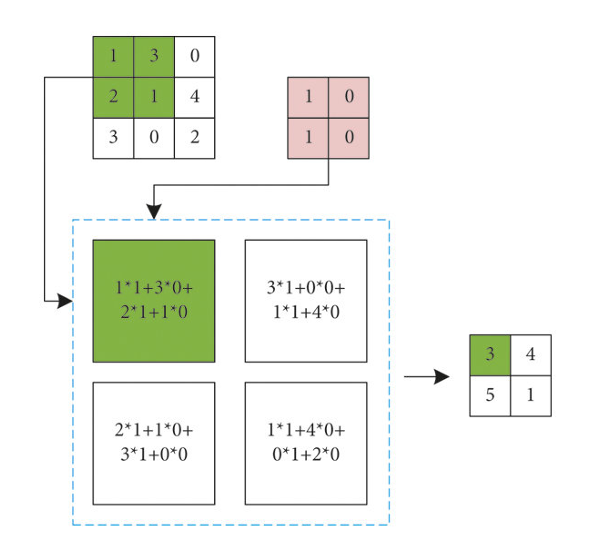

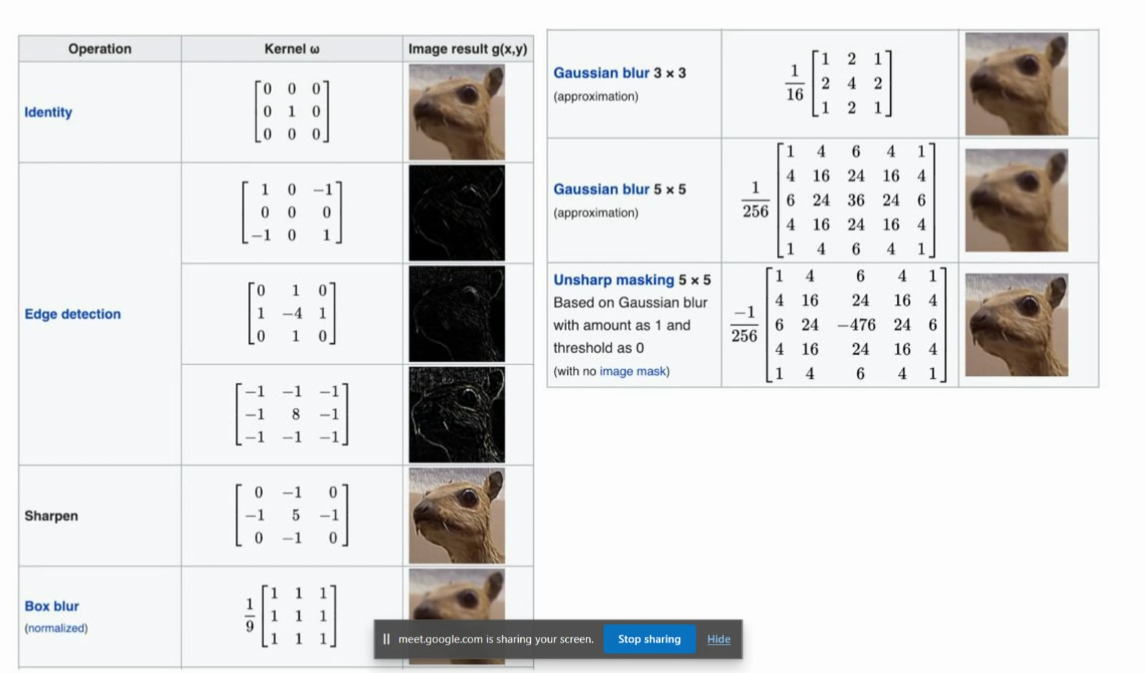

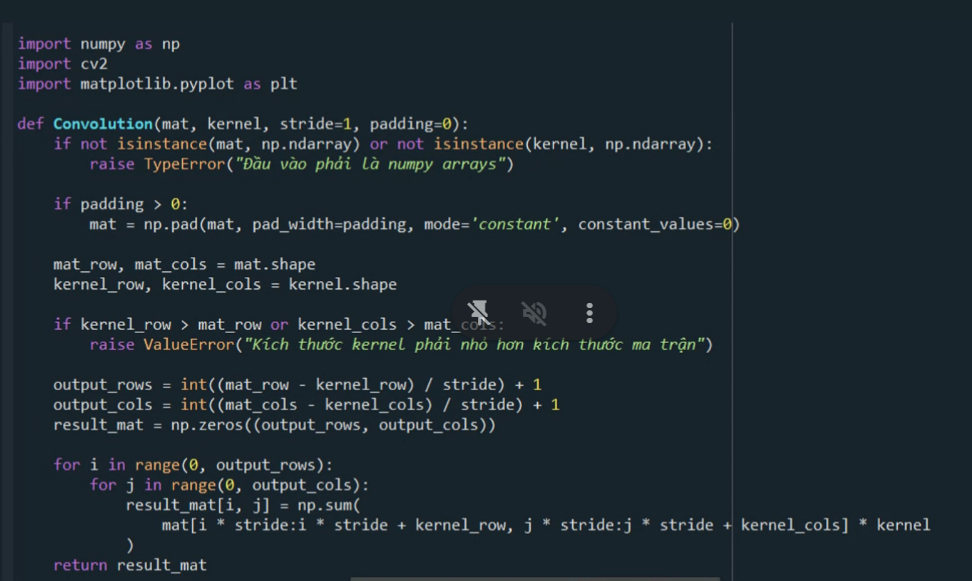

stride: trượt qua phải bao nhiêu ô

 Padding là kỹ thuật thêm các đường viền xung quanh ảnh đầu vào trước khi
 thực hiện phép tích chập

Max Pooling và Average Pooling là hai kỹ thuật thu gọn phổ biến được sử
 dụng trong mạng nơ-ron tích chập (CNN) để giảm kích thước dữ liệu và cải thiện
 hiệu suất tính toán.

In [28]:
# Định nghĩa ma trận A và kernel
mat_a = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

kernel_B = [
    [2, 4],
    [1, 3]
]

# Hàm tính convolution theo phương pháp "valid"
def valid_convolution(input_matrix, kernel):
    m = len(input_matrix)         # số dòng của input
    n = len(input_matrix[0])      # số cột của input
    k_m = len(kernel)             # số dòng của kernel
    k_n = len(kernel[0])          # số cột của kernel
    out = []
    # Lặp qua các vị trí "valid" trong input
    for i in range(m - k_m + 1):
        row = []
        for j in range(n - k_n + 1):
            s = 0
            for a in range(k_m):
                for b in range(k_n):
                    s += input_matrix[i + a][j + b] * kernel[a][b]
            row.append(s)
        out.append(row)
    return out

# Câu 1: Tính convolution khi áp dụng kernel_B vào A
result1 = valid_convolution(mat_a, kernel_B)
print("Câu 1:", result1)  # Output dự kiến: [[29, 39], [59, 69]]

# Câu 2: Tính convolution khi áp dụng kernel_C vào A
kernel_C = [
    [1, 1, 1],
    [0, 0, 0],
    [1, 1, 1]
]
result2 = valid_convolution(mat_a, kernel_C)
# Vì khi áp dụng kernel 3x3 trên ma trận 3x3 ta chỉ thu được một giá trị,
# chuyển kết quả 1x1 thành danh sách một phần tử
if len(result2) == 1 and len(result2[0]) == 1:
    result2 = [result2[0][0]]
print("Câu 2:", result2)  # Output dự kiến: [30]


Câu 1: [[29, 39], [59, 69]]
Câu 2: [30]


# 14.  Numpy- Term frequency and Invert Document Frequency

```
Lần lượt nhá 

TF: 
1. Giải thích đơn giản công thức 
2. Công thức
3. Chứng minh công thức 
4. Ví dụ 

 TF-IDF
```

```
1. Lấy ví dụ về: TF - IDF - TF-IDF
2. Công thức và Giải thích công thức
```

### 🌟 **1. Ví dụ về TF, IDF và TF-IDF**  

#### 📜 **Tập tài liệu (corpus)** gồm 3 tài liệu:  
- **Tài liệu 1**: "AI is the future"  
- **Tài liệu 2**: "AI will change the world"  
- **Tài liệu 3**: "The future is bright with AI"  

---

### 📌 **A. Ví dụ về TF (Term Frequency)**  
#### 📝 **Tính TF cho từ "AI" trong Tài liệu 1**  
- **Tài liệu 1**: "AI is the future"  
- Số lần từ **"AI"** xuất hiện: **1**  
- Tổng số từ trong tài liệu: **4**  

#### 🧮 **Công thức TF**:  
$
TF(\text{"AI"}, d_1) = \frac{1}{4} = 0.25
$  
👉 **Kết quả**: TF("AI", Tài liệu 1) = **0.25**  

---

### 📌 **B. Ví dụ về IDF (Inverse Document Frequency)**  
#### 📝 **Tính IDF cho từ "AI"**  
- **Tổng số tài liệu (|D|)**: 3  
- **Số tài liệu chứa từ "AI"**:  
  - Tài liệu 1: Có  
  - Tài liệu 2: Có  
  - Tài liệu 3: Có  
  → Số tài liệu chứa "AI" = 3  

#### 🧮 **Công thức IDF**:  
$
IDF(\text{"AI"}, D) = \log \left( \frac{3}{1 + 3} \right) = \log \left( \frac{3}{4} \right) \approx -0.1249
$  
👉 **Kết quả**: IDF("AI") ≈ **-0.1249** (rất thấp vì "AI" xuất hiện trong tất cả tài liệu)  

---

### 📌 **C. Ví dụ về TF-IDF**  
#### 📝 **Tính TF-IDF cho từ "AI" trong Tài liệu 1**  
$
TF\text{-}IDF(\text{"AI"}, d_1, D) = TF(\text{"AI"}, d_1) \times IDF(\text{"AI"}, D)
$
$
TF\text{-}IDF(\text{"AI"}) = 0.25 \times (-0.1249) = -0.031225
$
👉 **Kết quả**: TF-IDF("AI", Tài liệu 1) ≈ **-0.0312**  

📌 **Giải thích**:  
- Dù "AI" xuất hiện trong tài liệu, nhưng vì nó **quá phổ biến** trong toàn bộ tập tài liệu, nên giá trị TF-IDF **thấp**, cho thấy từ này **không giúp phân biệt** tài liệu.  

---

### 💎 **Ví dụ khác với từ hiếm: "bright"**  
- "bright" chỉ xuất hiện trong **Tài liệu 3**.  
- **TF("bright", Tài liệu 3)** = 1/6 ≈ **0.1667**  
- **IDF("bright")** =  
$
IDF(\text{"bright"}) = \log \left( \frac{3}{1+1} \right) = \log\left(\frac{3}{2}\right) \approx 0.1761
$ 
- **TF-IDF("bright", Tài liệu 3)** = 0.1667 × 0.1761 ≈ **0.02935**  

📌 **Giải thích**:  
- Từ **"bright"** có TF-IDF cao hơn "AI" vì nó **hiếm**, chỉ xuất hiện trong 1 tài liệu, nên giúp **phân biệt nội dung** tài liệu đó tốt hơn.  

---

---

### 🌟 **2. Công thức và Giải thích công thức**  

---

### 📌 **A. TF (Term Frequency)**  

#### 📚 **Công thức**  
$
TF(t,d) = \frac{\text{số lần từ } t \text{ xuất hiện trong tài liệu } d}{\text{tổng số từ trong tài liệu } d}
$ 

#### 💡 **Giải thích**  
- **TF** cho biết từ $ t $ **xuất hiện thường xuyên như thế nào** trong một tài liệu $ d $.  
- **Chia cho tổng số từ** để TF trở thành một **tỉ lệ**, giúp so sánh giữa các tài liệu có độ dài khác nhau.  
- **TF cao** → Từ quan trọng trong tài liệu đó.  

---

### 📌 **B. IDF (Inverse Document Frequency)**  

#### 📚 **Công thức**  
$
IDF(t,D) = \log \left( \frac{|D|}{1 + |\{d \in D : t \in d\}|} \right)
$ 

#### 💡 **Giải thích**  
- **IDF** đo lường **mức độ hiếm** của một từ trên toàn bộ tập tài liệu.  
- Nếu từ xuất hiện trong **nhiều tài liệu**, IDF **thấp** → Từ đó không có giá trị phân biệt.  
- **Tại sao dùng log?**  
  - Giúp giá trị IDF **không tăng quá nhanh** khi từ rất hiếm.  
- **+1 trong mẫu số** để tránh lỗi chia cho 0 khi từ không xuất hiện.  

---

### 📌 **C. TF-IDF (Term Frequency–Inverse Document Frequency)**  

#### 📚 **Công thức**  
$
TF\text{-}IDF(t,d,D) = TF(t,d) \times IDF(t,D)
$ 

#### 💡 **Giải thích**  
- **TF-IDF** kết hợp hai khái niệm:  
  - **TF**: Từ có quan trọng trong tài liệu không?  
  - **IDF**: Từ đó có hiếm trong tập tài liệu không?  
- **TF cao + IDF cao** → **Từ khóa quan trọng** cho tài liệu.  
- **TF cao + IDF thấp** → Từ phổ biến, **không mang tính phân biệt**.  

---

### 🎯 **Tóm tắt nhanh:**  
- **TF**: Từ xuất hiện **bao nhiêu lần** trong tài liệu.  
- **IDF**: Từ đó **hiếm hay phổ biến** trên toàn bộ tập tài liệu.  
- **TF-IDF**: Kết hợp hai yếu tố trên để tìm từ **quan trọng nhất** cho mỗi tài liệu.  

---

✨ **Nếu Quốc muốn đào sâu thêm hoặc cần ví dụ phức tạp hơn, mình sẵn sàng hỗ trợ nhé!** 😊

####  Bài tập: Viết chương trình Python để tính toán giá trị TF-IDF của các từ trong một
 List gồm các câu: ["Tôi thích học AI", "AI là trí tuệ nhân tạo", "AGI là siêu trí tuệ
 nhân tạo"] và sử dụng thư viện numpy để hỗ trợ trong việc tính toán các ma trận.
 Biết các

In [31]:
import numpy as np
import math

# Bước 1: Tạo tập tài liệu mẫu
documents = ["Tôi thích học AI", 
             "AI là trí tuệ nhân tạo", 
             "AGI là siêu trí tuệ nhân tạo"]


In [36]:
def compute_tf(doc):
    """
    doc: chuỗi, ví dụ: doc = "Tôi thích học AI"
    TF: Tính số lần xuất hiện của từng từ trong chuỗi. 
    Công thức : TF(word) = (Số lần từ xuất hiện trong doc) / (Tổng số từ trong doc)
    """
    words = doc.lower().split()  # Chuyển thành chữ thường và tách từ
    unique_words = sorted(set(words))  # Lấy danh sách từ duy nhất và sắp xếp

    # Tính TF cho từng từ bằng list comprehension
    tf_vector = [words.count(word) / len(words) for word in unique_words]

    return unique_words, tf_vector


# Kiểm tra hàm
uniwords, tf_vector = compute_tf("Tôi thích học AI tôi")
print("Từ duy nhất:", uniwords)
print("Vector TF:", [round(tf, 4) for tf in tf_vector])


Từ duy nhất: ['ai', 'học', 'thích', 'tôi']
Vector TF: [0.2, 0.2, 0.2, 0.4]


```
idf_vector = [0.0] * len(all_words)  # Sử dụng list thay cho numpy array
idf_vector = np.zeros(len(all_words))  # Vector IDF
```

In [ ]:
import numpy as np
import math

def compute_idf(docs):
    """
    IDF: Biểu thị tần xuất của từ đó trong các tài liệu
    📚 Tính IDF theo công thức gốc:
    IDF(t,D) = log( |D| / (1 + df) )
    """
    all_words = set(word for doc in docs for word in doc.lower().split())
    all_words = sorted(list(all_words))  # Sắp xếp để giữ thứ tự cố định
    print(all_words)
    N = len(docs)  # Số lượng tài liệu
    # idf_vector = [0.0] * len(all_words)  # Sử dụng list thay cho numpy array
    idf_vector = np.zeros(len(all_words))  # Vector IDF
    print(idf_vector)

    # Tính IDF cho từng từ
    for i, word in enumerate(all_words):
        df = sum(1 for doc in docs if word in doc.lower().split())  # Số tài liệu chứa từ
        print(word, df)
        idf_vector[i] = math.log(N / (df + 1))  # 💡 Công thức đúng theo yêu cầu
        print(idf_vector[i])
        print("--")
    return all_words, idf_vector


# 🧪 **Kiểm tra hàm compute_idf với tập tài liệu mẫu**
documents = [
    "AI is the future",
    "AI will change the world",
]

print("=== 📌 Kiểm tra hàm compute_idf ===")
idf_words, idf_vector = compute_idf(documents)
print(f"📚 Tập từ vựng (Vocabulary): {idf_words}")
print(f"📊 Vector IDF: {np.round(idf_vector, 4)}\n")


=== 📌 Kiểm tra hàm compute_idf ===
['ai', 'change', 'future', 'is', 'the', 'will', 'world']
[0. 0. 0. 0. 0. 0. 0.]
ai 2
-0.40546510810816444
--
change 1
0.0
--
future 1
0.0
--
is 1
0.0
--
the 2
-0.40546510810816444
--
will 1
0.0
--
world 1
0.0
--
📚 Tập từ vựng (Vocabulary): ['ai', 'change', 'future', 'is', 'the', 'will', 'world']
📊 Vector IDF: [-0.4055  0.      0.      0.     -0.4055  0.      0.    ]



tdf 'ai' = = log (số tài liệu / (1+ số lần xuất hiện của từ ai trong các tài liệu)) = log (2/3) =  -0.4055  
tdf 'is' = log (số tài liệu / (1+ số lần xuất hiện của từ is trong các tài liệu)) = log (2/(1+1)) =  0 

In [15]:
import numpy as np
import math

def compute_tf(doc, vocab):
    """
    📚 Tính TF (Term Frequency) cho một tài liệu.
    - doc: chuỗi văn bản
    - vocab: danh sách từ vựng duy nhất
    - Trả về: vector TF cho tài liệu
    """
    words = doc.lower().split()
    tf_vector = [words.count(word) / len(words) for word in vocab]
    return tf_vector


def compute_idf(docs, vocab):
    """
    🧮 Tính IDF (Inverse Document Frequency) cho toàn bộ tập tài liệu.
    - docs: danh sách văn bản
    - vocab: danh sách từ vựng duy nhất
    - Trả về: vector IDF cho từ vựng
    """
    N = len(docs)  # Tổng số tài liệu
    idf_vector = []
    for word in vocab:
        df = sum(1 for doc in docs if word in doc.lower().split())  # Số tài liệu chứa từ
        idf_vector.append(math.log(N / (1 + df)))  # IDF theo công thức gốc
    return idf_vector


def compute_tf_idf(docs):
    """
    🔗 Tính TF-IDF cho tập tài liệu.
    - docs: danh sách văn bản
    - Trả về:
        + vocab: danh sách từ vựng duy nhất
        + tf_idf_vectors: TF-IDF vector cho từng tài liệu
    """
    # 📚 Lấy tập từ vựng duy nhất từ tất cả tài liệu
    vocab = sorted(set(word for doc in docs for word in doc.lower().split()))

    # 🧮 Tính IDF cho từ vựng
    idf_vector = compute_idf(docs, vocab)

    # 🔗 Tính TF-IDF cho từng tài liệu
    tf_idf_vectors = []
    for doc in docs:
        tf_vector = compute_tf(doc, vocab)
        tf_idf_vector = [tf * idf for tf, idf in zip(tf_vector, idf_vector)]
        tf_idf_vectors.append(tf_idf_vector)

    return vocab, tf_idf_vectors


# 🧪 **Kiểm tra hàm với tập tài liệu mẫu**
documents = [
    "AI is the future",
    "AI will change the world",
    "The future is bright with AI"
]

vocab, tf_idf_vectors = compute_tf_idf(documents)

# 📊 **In kết quả TF-IDF**
print(f"📚 Tập từ vựng (Vocabulary): {vocab}\n")
for i, tf_idf in enumerate(tf_idf_vectors):
    print(f"📄 TF-IDF - Tài liệu {i + 1}: {[round(val, 4) for val in tf_idf]}")


📚 Tập từ vựng (Vocabulary): ['ai', 'bright', 'change', 'future', 'is', 'the', 'will', 'with', 'world']

📄 TF-IDF - Tài liệu 1: [-0.0719, 0.0, 0.0, 0.0, 0.0, -0.0719, 0.0, 0.0, 0.0]
📄 TF-IDF - Tài liệu 2: [-0.0575, 0.0, 0.0811, 0.0, 0.0, -0.0575, 0.0811, 0.0, 0.0811]
📄 TF-IDF - Tài liệu 3: [-0.0479, 0.0676, 0.0, 0.0, 0.0, -0.0479, 0.0, 0.0676, 0.0]


Summary
- **TF**: Từ xuất hiện **bao nhiêu lần** trong tài liệu.  
- **IDF**: Từ đó **hiếm hay phổ biến** trên toàn bộ tập tài liệu.  
- **TF-IDF**: Kết hợp hai yếu tố trên để tìm từ **quan trọng nhất** cho mỗi tài liệu.  


Chẳng hạn: 
- 1 từ xuất hiện nhiều trong 1 tài liệu. => TF lớn 
- Từ đấy nó chỉ xuất hiện trong 1 tài liệu thôi, trên tổng số 100 tài liệu => IDF lớn. 
=> TF-IDF = tích của 2 thằng trên => Từ này nó quan trọng. 

Chẳng hạn: 
```
documents = [
    "AI is the future",
    "AI will change the world",
    "The future is bright with AI"
]

```

Ví dụ này: từ AI xuất hiện 1 lần trong 1 tài liệu => TF nhỏ. 
Từ AI xuất hiện ở cả 3 tài liệu => IDF NHỎ 
=> TF-IDF nhỏ => Từ 'AI' không phải từ quá quan trongj


# Day 15: Basic Python- Basic Data Analysis

 1 Correlation (Tương quan)
 Correlation là một phép đo thống kê cho biết mức độ và hướng của mối quan hệ giữa hai
 biến số. Khi hai biến số có mối quan hệ tương quan, giá trị của một biến có thể ảnh hưởng
 đến giá trị của biến còn lại.
 - Positive Correlation (Tương quan dương): Khi giá trị của một biến tăng thì giá
 trị của biến kia cũng tăng.
 - Negative Correlation (Tương quan âm): Khi giá trị của một biến tăng thì giá trị
 của biến kia giảm.
 - No Correlation (Không tương quan): Không có mối quan hệ rõ ràng giữa hai
 biến.

 2 Correlation Coefficient (Hệ số tương quan)
 Hệ số tương quan là một giá trị số từ-1 đến 1 cho biết mức độ của mối quan hệ tương quan:
- 1: Mối quan hệ tương quan hoàn hảo dương.
- 0: Không có mối quan hệ tương quan.
-  -1: Mối quan hệ tương quan hoàn hảo âm.

3. 1 ví dụ đơn giản: 
- Cho giá nhà ...

 📊 **1. Correlation (Tương quan)**  
**Tương quan** là một phép đo thống kê cho biết **mức độ** và **hướng** của mối quan hệ giữa hai biến số. Khi hai biến có mối quan hệ tương quan, sự thay đổi của một biến có thể ảnh hưởng đến biến còn lại.

 🌟 **Các loại tương quan:**  
- 🔼 **Tương quan dương (Positive Correlation):**  
  Khi giá trị của một biến tăng thì giá trị của biến kia **cũng tăng**.  
  _(Ví dụ: Số giờ học và điểm số thi IELTS — càng học nhiều, điểm càng cao.)_  
- 🔽 **Tương quan âm (Negative Correlation):**  
  Khi giá trị của một biến tăng thì giá trị của biến kia **giảm**.  
  _(Ví dụ: Số giờ giải trí và điểm số thi — càng giải trí nhiều, điểm thi có thể giảm.)_  
- 🚫 **Không tương quan (No Correlation):**  
  Không có mối quan hệ rõ ràng giữa hai biến.  
  _(Ví dụ: Số giày bạn sở hữu và điểm thi IELTS.)_  

---

 🧮 **2. Correlation Coefficient (Hệ số tương quan)**  
**Hệ số tương quan** là một giá trị từ **-1** đến **1**, cho biết **mức độ mạnh/yếu** và **chiều hướng** của mối quan hệ tương quan:

| Giá trị | Ý nghĩa                                |
|---------|-----------------------------------------|
| 1       | 💯 Mối quan hệ tương quan dương hoàn hảo |
| 0       | 😶 Không có mối quan hệ tương quan       |
| -1      | 💯 Mối quan hệ tương quan âm hoàn hảo   |

---


### ✅ **Hàm tính hệ số tương quan Pearson (Pearson Correlation Coefficient)**

Công thức tính Pearson Correlation Coefficient $ r $:
$
r = \frac{\sum (X - \overline{X})(Y - \overline{Y})}{\sqrt{\sum (X - \overline{X})^2 \sum (Y - \overline{Y})^2}}
$

Trong đó:  
- $ X $ và $ Y $ là hai biến số.  
- $ \overline{X} $ và $ \overline{Y} $ là giá trị trung bình của $ X $ và $ Y $.


- \( X = [1, 2, 3]
- \( Y = [2, 4, 6]
=> Tương quan = 1 

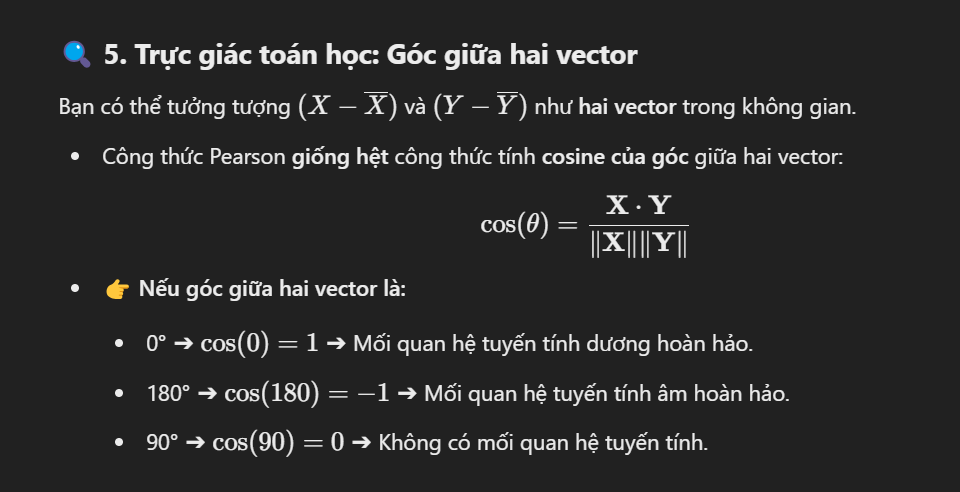

Giả sử bạn có hai biến số \( X \) và \( Y \) với các giá trị như sau:



### Bước 1: Tính giá trị trung bình
- Trung bình của \( X \):  
  \[
  \overline{X} = \frac{1+2+3+4+5}{5} = \frac{15}{5} = 3
  \]
- Trung bình của \( Y \):  
  \[
  \overline{Y} = \frac{2+4+6+8+10}{5} = \frac{30}{5} = 6
  \]

### Bước 2: Tính tử số (numerator)  
Tử số của công thức là:
\[
\sum (X_i - \overline{X})(Y_i - \overline{Y})
\]
Tính theo từng phần tử:

- Với \( X_1 = 1 \), \( Y_1 = 2 \):  
  \((1-3)(2-6) = (-2) \times (-4) = 8\)
- Với \( X_2 = 2 \), \( Y_2 = 4 \):  
  \((2-3)(4-6) = (-1) \times (-2) = 2\)
- Với \( X_3 = 3 \), \( Y_3 = 6 \):  
  \((3-3)(6-6) = 0 \times 0 = 0\)
- Với \( X_4 = 4 \), \( Y_4 = 8 \):  
  \((4-3)(8-6) = (1) \times (2) = 2\)
- Với \( X_5 = 5 \), \( Y_5 = 10 \):  
  \((5-3)(10-6) = (2) \times (4) = 8\)

Tổng tử số:
\[
8 + 2 + 0 + 2 + 8 = 20
\]

### Bước 3: Tính mẫu số (denominator)  
Mẫu số của công thức là:
\[
\sqrt{\sum (X_i - \overline{X})^2 \times \sum (Y_i - \overline{Y})^2}
\]

Tính từng phần:

- Với \( X \):
  - \((1-3)^2 = 4\)
  - \((2-3)^2 = 1\)
  - \((3-3)^2 = 0\)
  - \((4-3)^2 = 1\)
  - \((5-3)^2 = 4\)
  
  Tổng là: \(4 + 1 + 0 + 1 + 4 = 10\)

- Với \( Y \):
  - \((2-6)^2 = 16\)
  - \((4-6)^2 = 4\)
  - \((6-6)^2 = 0\)
  - \((8-6)^2 = 4\)
  - \((10-6)^2 = 16\)
  
  Tổng là: \(16 + 4 + 0 + 4 + 16 = 40\)

Do đó, mẫu số là:
\[
\sqrt{10 \times 40} = \sqrt{400} = 20
\]

### Bước 4: Tính hệ số tương quan Pearson
Áp dụng công thức:
\[
r = \frac{\sum (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum (X_i - \overline{X})^2 \times \sum (Y_i - \overline{Y})^2}} = \frac{20}{20} = 1
\]

### Ý nghĩa của kết quả
- \( r = 1 \) cho thấy có mối tương quan tuyến tính dương hoàn hảo giữa \( X \) và \( Y \).  
  Trong trường hợp này, \( Y \) luôn bằng \( 2X \) nên khi \( X \) tăng, \( Y \) tăng theo một cách hoàn hảo.

### Ví dụ bằng mã Python
Dưới đây là đoạn mã Python minh họa cách tính hệ số tương quan Pearson:

```python
def pearson_correlation(X, Y):
    if len(X) != len(Y):
        raise ValueError("Hai danh sách phải có cùng số lượng phần tử.")
    
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(Y) / n
    
    # Tính tử số
    numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(X, Y))
    
    # Tính mẫu số
    denominator = (sum((x - mean_x)**2 for x in X) * sum((y - mean_y)**2 for y in Y)) ** 0.5
    
    return numerator / denominator

# Ví dụ
X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]
r = pearson_correlation(X, Y)
print("Hệ số tương quan Pearson:", r)
```

Chạy đoạn mã trên, bạn sẽ nhận được kết quả:
```
Hệ số tương quan Pearson: 1.0
```

Như vậy, ví dụ trên cho thấy công thức Pearson tính ra hệ số tương quan là 1, biểu thị mối quan hệ tuyến tính dương hoàn hảo giữa hai biến số.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Đọc dataset
data = pd.read_csv("advertising.csv")

def correlation(x, y):
    """
    📊 Tính hệ số tương quan Pearson giữa hai biến x và y.
    - x, y: Pandas Series hoặc mảng numpy
    - Trả về: Giá trị Pearson Correlation Coefficient
    """
    # 📉 Tính giá trị trung bình của x và y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # 🧮 Áp dụng công thức Pearson
    numerator = np.sum((x - mean_x) * (y - mean_y))  # Tử số: Σ(X - X̄)(Y - Ȳ)
    denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))  # Mẫu số

    # 🔗 Trả về hệ số tương quan
    return numerator / denominator if denominator != 0 else 0


# 🧪 **Kiểm tra hàm với dữ liệu mẫu**
x = data['TV']
y = data['Radio']
corr_xy = correlation(x, y)

# 📊 **Kết quả**
print(f"Correlation between TV and Radio: {corr_xy:.4f}")  # 📈 Output mong đợi: 0.054


Correlation between TV and Radio: 0.0548


- \( X = [1, 2, 3]
- \( Y = [2, 4, 6]
=> Tương quan = 1 

- TV = [, ....]
- Radio = [, ...]

 3.1 Bài tập mở rộng
 Từ giá trị correlation coefficient ở trên, hãy vẽ biểu đồ heatmap để biểu hiện sự tương quan.
 Hướng dẫn:
 ```python
 1 ## Calculate coerelation here ##
 2 plt.figure(figsize=(10,8))
 3 sns.heatmap(#Your result coerelation here#, annot=True, fmt=".2f",
 linewidth=.5)
 4 plt.show()
 ```

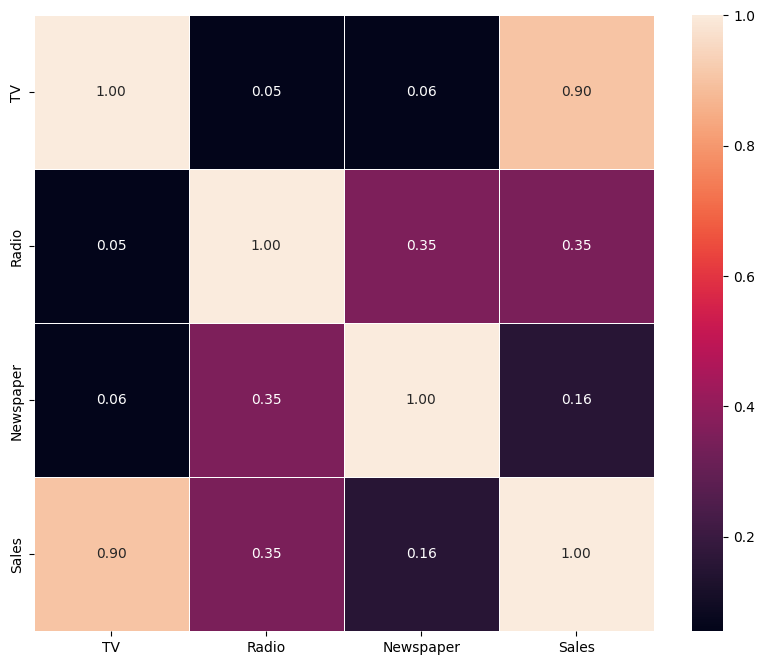

In [33]:
# Tính ma trận hệ số tương quan cho toàn bộ các biến
corr_matrix = data.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10,8))

# Vẽ heatmap với ma trận tương quan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)

# Hiển thị biểu đồ
plt.show()


Dựa vào cột sales
- TV có mối tương quan cáo với giá sales 
- Radio, Newspaper tương quan thấp 
---=
=> Chọn lựa biến: Feature Engineering.  